<a href="https://colab.research.google.com/github/rangaraju1/ML-Projects/blob/main/AmesHousingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

path = '/content/drive/MyDrive/MachineLearningMastery/AmesHousingProject/Ames.csv'
Ames = pd.read_csv(path)

# Dataset shape
print(Ames.shape)

rows,columns = Ames.shape
print(f"The dataset comprises {rows} properties described across {columns} attributes")

# Determine the data type for each feature
data_types = Ames.dtypes
print(data_types)

# Tally the total by data type
type_counts = data_types.value_counts()
print(type_counts)


(2579, 85)
The dataset comprises 2579 properties described across 85 attributes
PID                int64
GrLivArea          int64
SalePrice          int64
MSSubClass         int64
MSZoning          object
                  ...   
SaleCondition     object
GeoRefNo         float64
Prop_Addr         object
Latitude         float64
Longitude        float64
Length: 85, dtype: object
object     44
int64      27
float64    14
Name: count, dtype: int64


In [3]:
# Visualizing missing values.
missing_data = Ames.isnull().sum()
missing_percentage = (missing_data / len(Ames)) * 100
# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data,
'Percentage': missing_percentage})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Percentage', ascending=False)
# Display columns with missing values
print(missing_info[missing_info['Missing Values'] > 0])


              Missing Values  Percentage
PoolQC                  2570   99.651028
MiscFeature             2482   96.238852
Alley                   2411   93.485847
Fence                   2054   79.643273
MasVnrType              1572   60.953858
FireplaceQu             1241   48.119426
LotFrontage              462   17.913920
GarageQual               129    5.001939
GarageYrBlt              129    5.001939
GarageCond               129    5.001939
GarageFinish             129    5.001939
GarageType               127    4.924389
Latitude                  97    3.761148
Longitude                 97    3.761148
BsmtExposure              71    2.753005
BsmtFinType2              70    2.714230
BsmtFinType1              69    2.675456
BsmtQual                  69    2.675456
BsmtCond                  69    2.675456
GeoRefNo                  20    0.775494
Prop_Addr                 20    0.775494
MasVnrArea                14    0.542846
BsmtHalfBath               2    0.077549
BsmtFullBath    

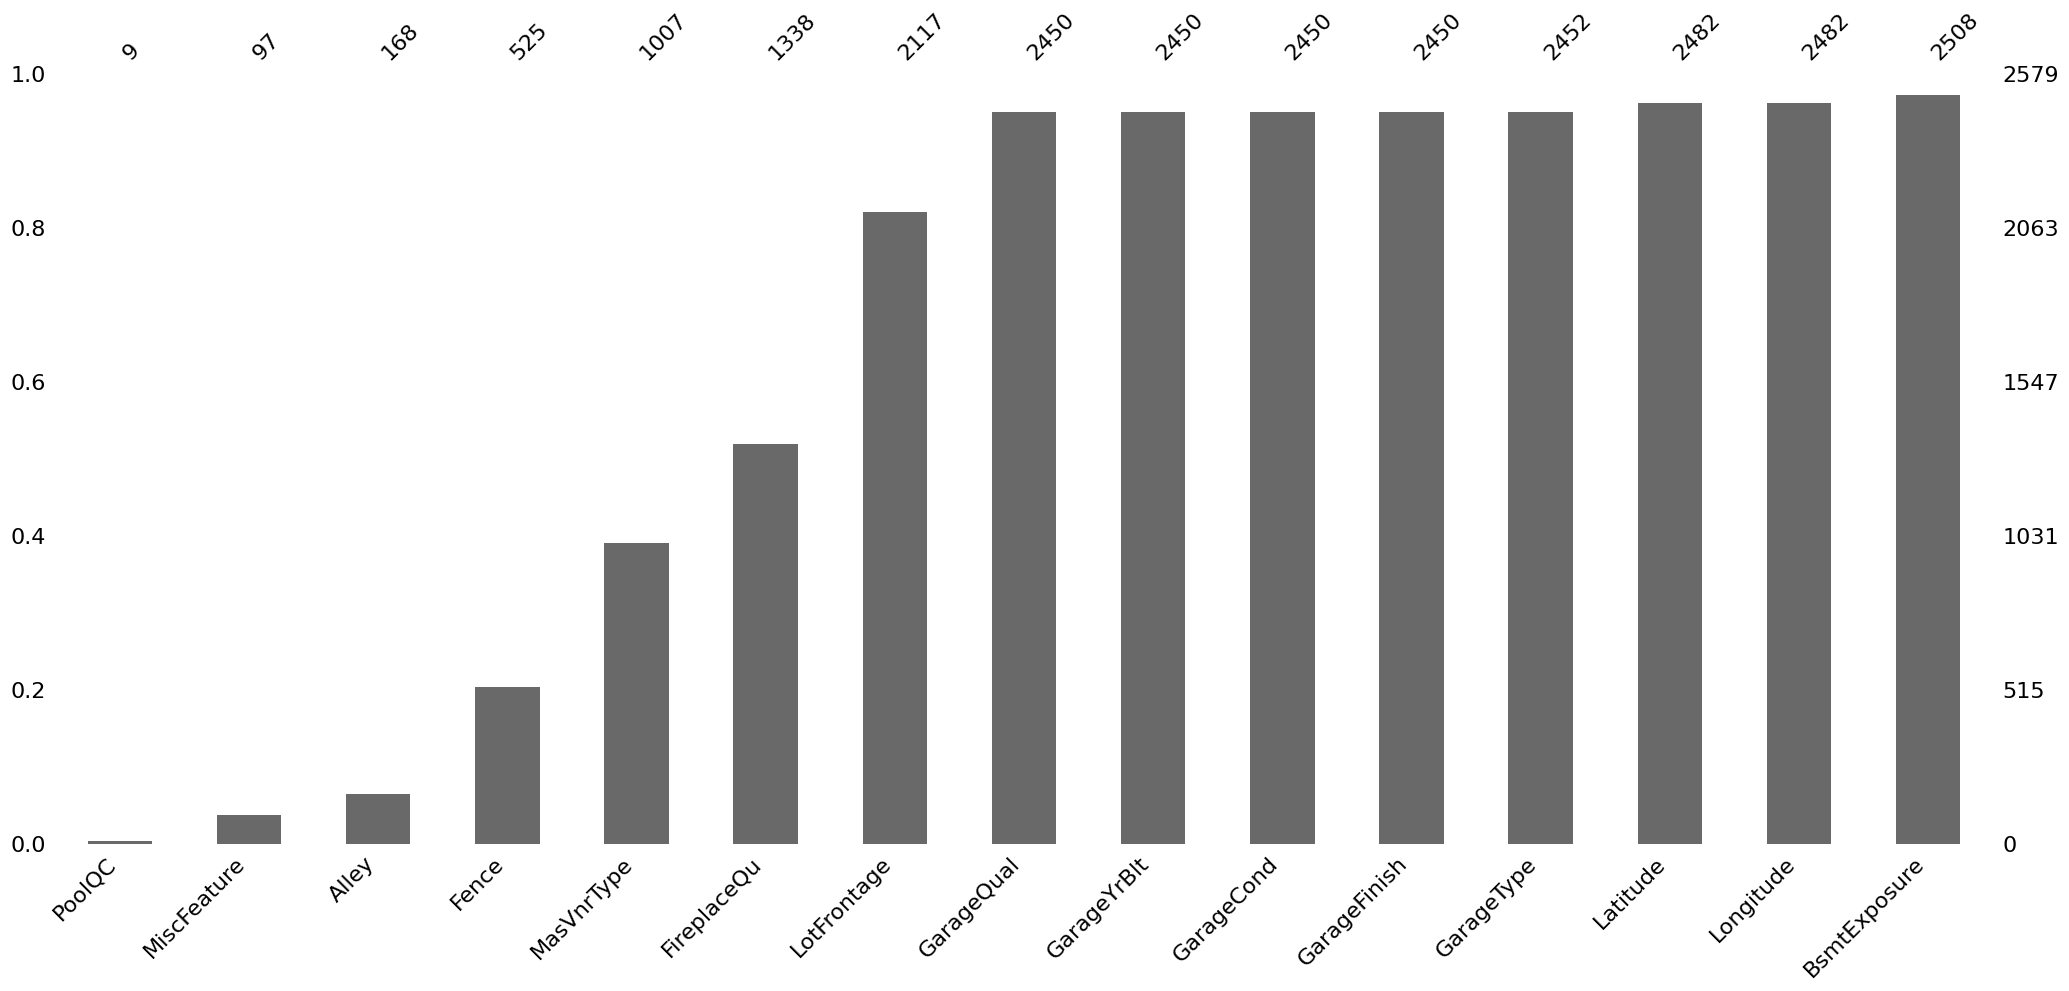

In [4]:
# You can get a bar chart using msno.bar to show the top 15 features withleast count of non-missing values, i.e., those with the most missing values.
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
# Calculating the percentage of missing values for each column
missing_data = Ames.isnull().sum()
missing_percentage = (missing_data / len(Ames)) * 100
# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data,
'Percentage': missing_percentage})
# Sort the DataFrame columns by the percentage of missing values
sorted_df = Ames[missing_info.sort_values(by='Percentage', ascending=False).index]
# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]
#Visual with missingno
msno.bar(top_15_missing)
plt.show()



           index  Missing Values  Percentage
0         PoolQC            2570   99.651028
1    MiscFeature            2482   96.238852
2          Alley            2411   93.485847
3          Fence            2054   79.643273
4     MasVnrType            1572   60.953858
5    FireplaceQu            1241   48.119426
6    LotFrontage             462   17.913920
7    GarageYrBlt             129    5.001939
8   GarageFinish             129    5.001939
9     GarageQual             129    5.001939
10    GarageCond             129    5.001939
11    GarageType             127    4.924389
12      Latitude              97    3.761148
13     Longitude              97    3.761148
14  BsmtExposure              71    2.753005


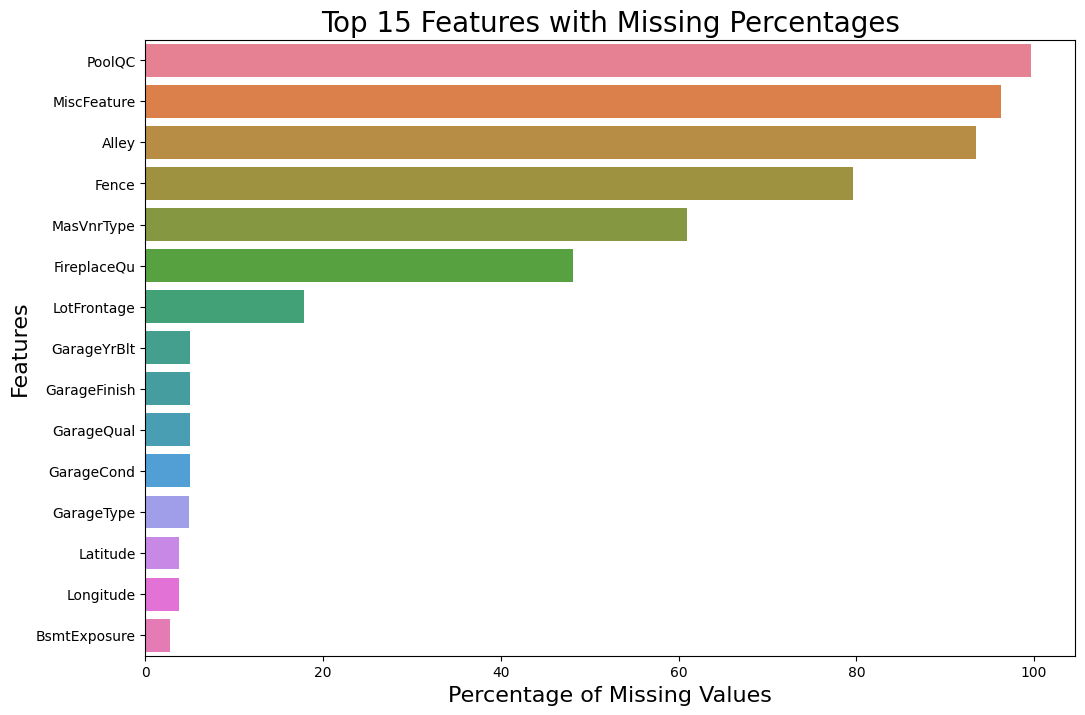

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Ames = pd.read_csv('Ames.csv')
missing_data = Ames.isnull().sum()
missing_percentage = (missing_data / len(Ames)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_data,
'Percentage': missing_percentage})
# Filter to show only the top 15 columns with the most missing values
top_15_missing_info = missing_info.nlargest(15, 'Percentage').reset_index()
print(top_15_missing_info)
# Create the horizontal bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y="index", hue="index", data=top_15_missing_info, orient='h')
plt.title('Top 15 Features with Missing Percentages', fontsize=20)
plt.xlabel('Percentage of Missing Values', fontsize=16)
plt.ylabel('Features', fontsize=16)
#plt.yticks(fontsize=11)
plt.show()
